In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
import random
from scipy import stats

In [26]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'



In [35]:
# dt = 0.02
# t_end=1
# # len_t = int(t_end/dt)
# len_tt = int(t_end/dt)
# # print (len_t)
# p = random.uniform(0, 2)
# h=2
# a=2
# u=0.0001
# k=1
# b = a / k

# stan_list=[p, h, a, u, k, b, t_end]
# len_stan = len(stan_list)

# # ts = 1/(b*h)
# # tamesi = ts - (-p+ts*(u+h))*dt
# # tamesi2 = tamesi*h*b
# # tamesi3 = np.sqrt(tamesi*h*b)
# # print(b, ts, tamesi, tamesi2, tamesi3)

# # print(ts)
columns1 = ['p', 'h', 'u', 'b']
ela1_list = []
stan1_list = []

dt = 0.02
t_end=1
len_tt = int(t_end/dt)

l = 1
v = 1
s = 0
smax = 1
lam = 0

In [36]:

#Pontryagin
#initial value


# p = 1
# h=2
# a=2
# u=0.0001
# k=1
# b = a / k
random.seed(1)
p = random.uniform(0, 2)
h = random.uniform(0, 4)
b = random.uniform(0, 3)
u = random.uniform(0, 0.01)
# k = random.uniform(0, 2)
# b = a / k

stan_list=[p, h, u, b]
# print(stan_list)
len_stan = len(stan_list)

#list

for m in range(200):
    ela_list=[]
    p = random.uniform(0, 2)
    h = random.uniform(0, 4)
    b = random.uniform(0, 4)
    u = random.uniform(0, 0.01)
    # b = a / k

    stan_list=[p, h, u, b]
    # print(df_ela1)
    for l in range(len_stan):
        s0_list =[]
        para_list=[]

        for j in range(2):
            s = 0
            lam = 0
            s_list =[s]
            lam_list = [lam]
            t_list = [t_end]

            stan_list=[p, h, u, b]

            if l==0:
                stan_list[l] = stan_list[l]*(1+0.2*j)
            elif l==1:
                stan_list[l] = stan_list[l]*(1+0.2*j)
            elif l==2:
                stan_list[l] = stan_list[l]*(1+0.2*j)
            elif l==3:
                stan_list[l] = stan_list[l]*(1+0.2*j)

            len_t = int(t_end/dt)
            t_list = [t_end]
            
            for i in range(len_t):
                
                t = t_list[0] - dt*(i+1)
                t_list.append(t)
                s = s_list[-1]
                lam = lam_list[-1]
                cri = 1/(stan_list[3]*stan_list[1])

                lam1 = lam + (stan_list[0]-s-lam*(stan_list[3] + stan_list[1]/(1 + stan_list[3]*s)))*dt

                if lam1<=cri:
                    s1 = 0
                elif (cri < lam1) and (lam1 < (1+stan_list[3]*smax)*cri):
                    s1 = (np.sqrt(lam1*stan_list[3]*stan_list[1])-1)/stan_list[3]
                # else:
                #     s1 = smax
                
                s_list.append(s1)
                lam_list.append(lam1)
            
            # print(s_list)
            s0_list.append(s_list[-1])
            para_list.append(stan_list[l])

        # print(s0_list)
        if s0_list[0]==0 or s0_list[1]==0:
            break

        ela1 = math.log(s0_list[1])-math.log(s0_list[0])
        ela2 = math.log(para_list[1])-math.log(para_list[0])
        ela = ela1 / ela2
        # print(ela)s
        ela_list.append(ela)
        if math.isnan(ela) == "True":
            break

    # print(ela_list)

    if ela_list != []:
        stan_list=[p, h, u, b]
        stan1_list.append(stan_list)
        ela1_list.append(ela_list)


df_ela = pd.DataFrame(ela1_list, columns=columns1)
df_stan = pd.DataFrame(stan1_list, columns=columns1)
df_ela.info()
# print (s0_list, para_list)
# df_ela1 = df_ela.drop(columns=['a', 'k'])

# print(ela_list)
# print(df_ela)
# print(df_stan)
# print(df_para)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p       74 non-null     float64
 1   h       74 non-null     float64
 2   u       74 non-null     float64
 3   b       74 non-null     float64
dtypes: float64(4)
memory usage: 2.4 KB


<Figure size 600x400 with 0 Axes>

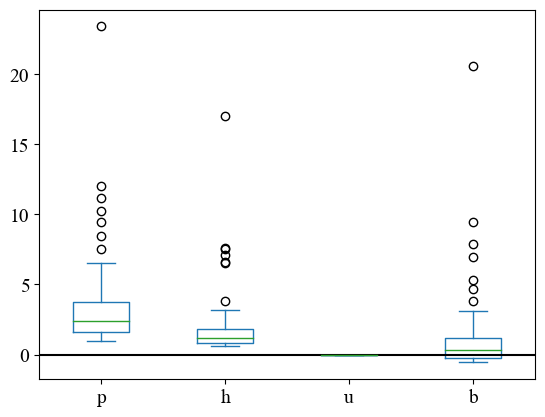

In [37]:
plt.figure(figsize=(6, 4))
df_ela.plot.box()
plt.axhline(0, ls="-", color="black")
plt.savefig('elastisity.png')
# plt.close('all')